# A quick intro to pandas

This is a short demo of the pandas data analysis library given at PyCon Canada 2016. To follow along, you'll need to download the CSV file of the Ontario public sector salary data [from this page](https://www.ontario.ca/page/public-sector-salary-disclosure-2015-all-sectors-and-seconded-employees).

In [1]:
# First, import the necesary libraries and run the magic function to draw charts inline

import pandas as pd
%matplotlib inline

In [2]:
# Load the CSV as a pandas data frame and inspect the first 5 rows

df = pd.read_csv('2015-combined-salary-seconded-utf8-en_3.csv')
df.head()

,Sector,Last name,First name,Salary Paid,Taxable Benefits,Employer,Job title,Calendar Year
0,Other Public Sector Employers,Weisbrodt,Jorn,"$207,692.37","$1,272.92","Toronto Festival of Arts, Culture and Creativity",Artistic Director,2015
1,Other Public Sector Employers,Parlee,Forrest,"$108,709.89",$0.00,Mitacs Inc.,"Director, Partnerships",2015
2,Other Public Sector Employers,Wagner,John Clyde,"$168,230.79",$867.92,"Toronto Festival of Arts, Culture and Creativity",Executive Producer,2015
3,Other Public Sector Employers,Yue,Jenny,"$114,158.53",$131.94,Colleges Ontario,"Senior Manager, Finance And Administration",2015
4,Other Public Sector Employers,Macdonald,Christine,"$100,789.02",$0.00,Mitacs Inc.,"Director, Business Development and Team Lead O...",2015


In [3]:
# How big is this dataframe (rows, columns)
df.shape

(115533, 8)

In [4]:
# Let's give it simple column labels for easier typing
col_names = ['sector', 'lastname', 'firstname', 'salary', 'benefits', 'employer', 'title', 'year']
df.columns = col_names
df.head()

,sector,lastname,firstname,salary,benefits,employer,title,year
0,Other Public Sector Employers,Weisbrodt,Jorn,"$207,692.37","$1,272.92","Toronto Festival of Arts, Culture and Creativity",Artistic Director,2015
1,Other Public Sector Employers,Parlee,Forrest,"$108,709.89",$0.00,Mitacs Inc.,"Director, Partnerships",2015
2,Other Public Sector Employers,Wagner,John Clyde,"$168,230.79",$867.92,"Toronto Festival of Arts, Culture and Creativity",Executive Producer,2015
3,Other Public Sector Employers,Yue,Jenny,"$114,158.53",$131.94,Colleges Ontario,"Senior Manager, Finance And Administration",2015
4,Other Public Sector Employers,Macdonald,Christine,"$100,789.02",$0.00,Mitacs Inc.,"Director, Business Development and Team Lead O...",2015


A data frame is a two-dimensional tabular data format, much like Excel sheets, SQL tables, or R data frames. Notice the first column, with bold number, is an auto-generated index, which is quite useful. You can also assign any column as the index. More on that later.

In [5]:
# There are two ways of accessing individual columns. As an attribute:

df.salary.head()

0    $207,692.37
1    $108,709.89
2    $168,230.79
3    $114,158.53
4    $100,789.02
Name: salary, dtype: object

In [6]:
# Or as a dict key:

df['sector'].head()

0    Other Public Sector Employers
1    Other Public Sector Employers
2    Other Public Sector Employers
3    Other Public Sector Employers
4    Other Public Sector Employers
Name: sector, dtype: object

Individual columns, on the other hand, are pandas Series. These are one-dimensional data structures but that also have index labels. Data frames and Series have their own sets of methods.

In [7]:
# To access multiple columns, use dict notation with a list of column names:
# You can also specify how many rows to show in head()
# Notice that when we have more then one column, the data structure is once again a data frame

df[['salary', 'title']].head(10)

,salary,title
0,"$207,692.37",Artistic Director
1,"$108,709.89","Director, Partnerships"
2,"$168,230.79",Executive Producer
3,"$114,158.53","Senior Manager, Finance And Administration"
4,"$100,789.02","Director, Business Development and Team Lead O..."
5,"$129,807.63","Senior Director, Corporate Partnerships"
6,"$102,222.20",Senior Project Management Analyst / Analyste p...
7,"$105,001.75",Professor
8,"$107,970.20",Professor
9,"$108,974.48",Professor


In [8]:
# Get some basic stats on the salary column

df.salary.describe()

count          115533
unique          98197
top       $207,080.29
freq              328
Name: salary, dtype: object

In [9]:
# Oops, pandas parsed the column as text because of the $ sign and comma
# Let's clean it up with a regex replace and turn it into a float
# Notice how pandas allows method chaining

df[['salary', 'benefits']] = df[['salary', 'benefits']].replace('[\$,]', '', regex=True).astype(float)
df.dtypes

sector        object
lastname      object
firstname     object
salary       float64
benefits     float64
employer      object
title         object
year           int64
dtype: object

Notice that we had to reassign the column values. If we had simply run this code:

`df[['salary', 'benefits']].replace('[\$,]', '', regex=True).astype(float)`

It would have created a modified copy of the columns for display. Much like a SELECT statement in SQL, it wouldn't have changed the contents of the data.

In [10]:
# OK, now it's a numerical column with real numerical stats

df.salary.describe()

count    1.155330e+05
mean     1.270957e+05
std      3.748158e+04
min      1.000000e+05
25%      1.055275e+05
50%      1.153404e+05
75%      1.331911e+05
max      1.528933e+06
Name: salary, dtype: float64

In [11]:
# That scientific notation is annoying. Let's get rid of it
# by setting float display options

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.salary.describe()

count    115533.00
mean     127095.72
std       37481.58
min      100000.00
25%      105527.50
50%      115340.41
75%      133191.11
max     1528933.36
Name: salary, dtype: float64

In [12]:
# You can get the frequency of values for string columns easily

df.sector.value_counts()

Municipalities and Services                                 34112
Universities                                                17065
School Boards                                               15346
Hospitals and Boards of Public Health                       13148
Government of Ontario - Ministries                          12581
Ontario Power Generation                                     7633
Other Public Sector Employers                                5378
Colleges                                                     4910
Crown Agencies                                               4328
Government of Ontario - Judiciary                             618
Government of Ontario - Legislative Assembly and Offices      242
Seconded (Education)*                                         126
Seconded (Community Safety and Correctional Services)*         36
Seconded (Health and LongTerm Care)*                           3
Seconded (Energy)*                                              3
Seconded (

In [13]:
# How many unique employers in the dataset?

len(df.employer.unique())

1626

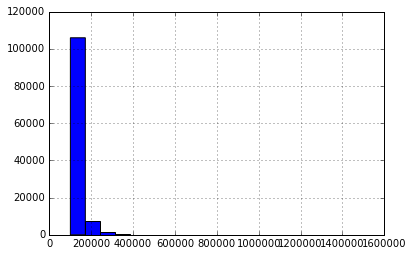

In [14]:
# We can quickly visualize the range of numerical values with a histogram

df.salary.hist(bins=20)

In [32]:
# Default chart styles are ugly. We can import one of matplotlib's pre-loaded styles

import matplotlib as plt
plt.style.available

['seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-dark',
 'seaborn-paper',
 'dark_background',
 'seaborn-poster',
 'classic',
 'seaborn-white',
 'seaborn-notebook',
 'seaborn-bright',
 'seaborn-dark-palette',
 'seaborn-colorblind',
 'seaborn-pastel',
 'bmh',
 'seaborn-deep',
 'grayscale',
 'seaborn-muted',
 'seaborn-whitegrid',
 'seaborn-talk',
 'ggplot']

In [34]:
plt.style.use('ggplot')

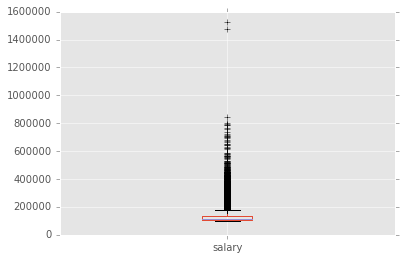

In [35]:
# Now try it with a boxplot

df.salary.plot(kind='box')

In [16]:
# Who are the highest-paid employees? Let's sort.

df.sort_values('salary', ascending=False)

,sector,lastname,firstname,salary,benefits,employer,title,year
74738,Ontario Power Generation,Mitchell,Thomas,1528933.36,66377.26,Ontario Power Generation,Chief Executive Officer Designate,2015
108977,Universities,Moriarty,William,1473445.98,1835.16,University of Toronto,"President And Chief Executive Officer, Univers...",2015
82403,Other Public Sector Employers,Anderson,Barbara Gail,844745.92,18115.26,Toronto Organizing Committee for the 2015 Pan ...,Senior Vice President and Chief Financial Offi...,2015
82460,Other Public Sector Employers,Vansen,Allen K.,802079.83,15096.06,Toronto Organizing Committee for the 2015 Pan ...,"Executive Vice President Operations, Sport and...",2015
73154,Ontario Power Generation,Jager,Glenn,793359.07,4536.00,Ontario Power Generation,Nuclear President and Chief Nuclear Officer,2015
82422,Other Public Sector Employers,Hacker,Karen,789880.64,15096.06,Toronto Organizing Committee for the 2015 Pan ...,"Senior Vice President, Human Resources / Volun...",2015
74092,Ontario Power Generation,Lyash,Jeffrey,787472.14,2488.00,Ontario Power Generation,President and Chief Executive Officer,2015
82426,Other Public Sector Employers,Henderson,Katherine,762996.71,13586.46,Toronto Organizing Committee for the 2015 Pan ...,"Senior Vice President, Marketing and Revenue /...",2015
29204,Hospitals and Boards of Public Health,Mapa,Joseph,760152.83,1404.00,Sinai Health System,President and Chief Executive Officer,2015
7923,Crown Agencies,Pepall,Jill,740378.24,748.93,Ontario Pension Board,Executive Vice President and Chief Investment ...,2015


In [17]:
# Lets filter salaries over $500,000

veryrich = df[df.salary >= 500000]
veryrich.salary.describe()

count        59.00
mean     644422.23
std      187497.80
min      500529.13
25%      529045.94
50%      587225.40
75%      700821.10
max     1528933.36
Name: salary, dtype: float64

A note about pandas' bizarro Boolean filtering, which is one of the most confusing parts for newcomers.

Just running the query without the brackets would have returned a Series of True and False values. That's because pandas is showing whether the condition we named is True or False for each row.

In [18]:
df.salary >= 500000

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
115503    False
115504    False
115505    False
115506    False
115507    False
115508    False
115509    False
115510    False
115511    False
115512    False
115513    False
115514    False
115515    False
115516    False
115517    False
115518    False
115519    False
115520    False
115521    False
115522    False
115523    False
115524    False
115525    False
115526    False
115527    False
115528    False
115529    False
115530    False
115531    False
115532    False
Name: salary, dtype: boo

So to only see the rows where it's True, you need that bracket notation:

In [28]:
df[df.salary >= 500000].head(10)

,sector,lastname,firstname,salary,benefits,employer,title,year,fullname
5182,Crown Agencies,Rabeneck,Linda,512100.63,47892.48,Cancer Care Ontario,Vice President / Vice-Présidente,2015,Linda Rabeneck
5193,Crown Agencies,Sherar,Michael,501834.58,46758.24,Cancer Care Ontario,Chief Executive Officer and President / Chef D...,2015,Michael Sherar
7073,Crown Agencies,Leclair,Rosemarie,512483.23,4616.89,Ontario Energy Board,Chair and Chief Executive Officer / Président-...,2015,Rosemarie Leclair
7156,Crown Agencies,Mayman,Gadi,567745.19,708.21,Ontario Financing Authority,Chief Executive Officer / Directeur général,2015,Gadi Mayman
7560,Crown Agencies,Dhindsa,Gurpreet,560617.35,965.16,Ontario Lottery and Gaming Corporation,Executive Vice President Chief Administrative ...,2015,Gurpreet Dhindsa
7584,Crown Agencies,Fioravanti,Walter,529597.82,2422.63,Ontario Lottery and Gaming Corporation,Senior Vice President Legal Regulatory Complia...,2015,Walter Fioravanti
7586,Crown Agencies,Flynn,Larry,506589.22,837.29,Ontario Lottery and Gaming Corporation,Senior Vice President Gaming / Vice-président ...,2015,Larry Flynn
7897,Crown Agencies,Fuller,Mark,640709.17,720.73,Ontario Pension Board,President and Chief Executive Officer / Présid...,2015,Mark Fuller
7923,Crown Agencies,Pepall,Jill,740378.24,748.93,Ontario Pension Board,Executive Vice President and Chief Investment ...,2015,Jill Pepall
7930,Crown Agencies,Whibbs,Brian,518512.28,582.46,Ontario Pension Board,"Managing Director, Real Estate / Directeur gén...",2015,Brian Whibbs


In [20]:
# Filtering by multiple conditions: wrap each condition with parenthesis.
# AND is &, OR is | (pipe)

df[(df.salary >= 500000) & (df.sector == 'Universities')]

,sector,lastname,firstname,salary,benefits,employer,title,year
108228,Universities,Hussey,Adrian,547714.04,283.14,University of Toronto,"Managing Director, Portfolio And Risk Analysis...",2015
108977,Universities,Moriarty,William,1473445.98,1835.16,University of Toronto,"President And Chief Executive Officer, Univers...",2015
109368,Universities,Richards,Cameron,710263.96,283.14,University of Toronto,"Managing Director, Investment Strategy and Co-...",2015
109661,Universities,Smith,Daren,693507.00,565.98,University of Toronto,"Managing Director, Manager Selection And Portf...",2015


There are many convenient methods for dealing with strings, some of which are handy for filtering. To access cells at the string level, you have to add `str` to the column name. Some examples:

In [51]:
# Return all record with "Toronto" in the employer name

df[df.employer.str.contains('Toronto')]

,sector,lastname,firstname,salary,benefits,employer,title,year,fullname
0,Other Public Sector Employers,Weisbrodt,Jorn,207692.37,1272.92,"Toronto Festival of Arts, Culture and Creativity",Artistic Director,2015,Jorn Weisbrodt
2,Other Public Sector Employers,Wagner,John Clyde,168230.79,867.92,"Toronto Festival of Arts, Culture and Creativity",Executive Producer,2015,John Clyde Wagner
5,Other Public Sector Employers,Udovic,Natasha,129807.63,867.92,"Toronto Festival of Arts, Culture and Creativity","Senior Director, Corporate Partnerships",2015,Natasha Udovic
6,Other Public Sector Employers,Tanos,Antonia,102222.20,3664.48,Toronto Organizing Committee for the 2015 Pan ...,Senior Project Management Analyst / Analyste p...,2015,Antonia Tanos
6394,Crown Agencies,Bone,Gillian,130026.90,62.66,Local Health Integration Network - Toronto Cen...,"Senior Consultant, Performance Management / Co...",2015,Gillian Bone
6395,Crown Agencies,Chan,Dorothy,115812.82,371.28,Local Health Integration Network - Toronto Cen...,Finance Lead and Senior Consultant / Responsab...,2015,Dorothy Chan
6396,Crown Agencies,Damba,Cynthia,104012.34,62.66,Local Health Integration Network - Toronto Cen...,Senior Planner and Epidemiologist / Planificat...,2015,Cynthia Damba
6397,Crown Agencies,Del Rizzo,Nello,133676.43,359.84,Local Health Integration Network - Toronto Cen...,"Senior Consultant, Performance Management / Co...",2015,Nello Del Rizzo
6398,Crown Agencies,Fakim,Shehnaz,111115.53,62.66,Local Health Integration Network - Toronto Cen...,"Senior Consultant, Health System Integration, ...",2015,Shehnaz Fakim
6399,Crown Agencies,Falconer,Simone,111376.91,178.18,Local Health Integration Network - Toronto Cen...,"Senior Consultant, Local Health Integration Ne...",2015,Simone Falconer


In [53]:
# Return the last names that begin with "Mc"

df[df.lastname.str.startswith('Mc')]

,sector,lastname,firstname,salary,benefits,employer,title,year,fullname
228,Colleges,McAleer,Dianna L.,100461.76,129.56,Algonquin College,Professor,2015,Dianna L. McAleer
229,Colleges,McBride,Scott,107920.20,129.56,Algonquin College,Professor,2015,Scott McBride
230,Colleges,McConkey,Deborah,100523.70,85.86,Algonquin College,Professor,2015,Deborah McConkey
231,Colleges,McCormick,Sandra C.,122377.80,174.16,Algonquin College,"Chair, Wellness And Innovation",2015,Sandra C. McCormick
232,Colleges,McCoy,Lee,110779.56,129.56,Algonquin College,Professor,2015,Lee McCoy
233,Colleges,McCutcheon,Diane,160542.22,238.76,Algonquin College,"Director, Labour Relations",2015,Diane McCutcheon
234,Colleges,McLarty,Joseph,102232.29,129.56,Algonquin College,Professor,2015,Joseph McLarty
235,Colleges,McNair,Duane,228837.54,519.36,Algonquin College,"Vice President, Finance And Administration",2015,Duane McNair
236,Colleges,McVitty,Ian W.,107920.20,85.86,Algonquin College,Professor,2015,Ian W. McVitty
434,Colleges,McCall,Sherrill,123428.24,262.61,Cambrian College,"Dean, Planning And Research And School Of Comm...",2015,Sherrill McCall


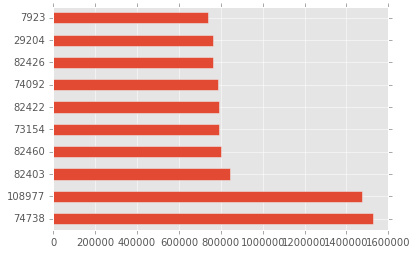

In [49]:
# Take the top 10 earners and plot it on a horizontal bar chart

df.sort_values('salary', ascending=False).salary.head(10).plot(kind='barh')

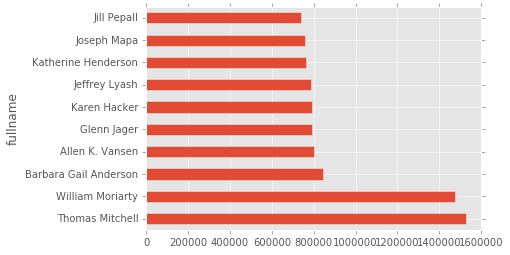

In [50]:
# Useless. That's because the plot convenience method uses the data frame index
# as labels. But we didn't set the index.
# But let's first create a new column with the full name

df['fullname'] = df['firstname'] + ' ' + df['lastname']

# Now run the plotting code again, making good use of method chaining for readability

( df.set_index('fullname')
 .sort_values('salary', ascending=False).salary
 .head(10)
 .plot(kind='barh') 
)

In [23]:
# Indexes are very useful for filtering data by a column value

bysector = df.set_index('sector')
bysector.loc['Universities']

,lastname,firstname,salary,benefits,employer,title,year,fullname
sector,,,,,,,,
Universities,Webb,Paul,105001.75,622.01,King's University College,Professor,2015,Paul Webb
Universities,Antunes,Pedro,113885.54,8390.27,Algoma University,Associate Professor,2015,Pedro Antunes
Universities,Bloomfield,Laurie,105959.33,7383.28,Algoma University,Associate Professor,2015,Laurie Bloomfield
Universities,Boyle,Noni,107097.35,7835.15,Algoma University,Associate Professor,2015,Noni Boyle
Universities,Broad,Gayle,139197.43,0.00,Algoma University,Associate Professor,2015,Gayle Broad
Universities,Brodbeck,David,126391.11,0.00,Algoma University,Associate Professor,2015,David Brodbeck
Universities,Burnett,Linda,106429.35,0.00,Algoma University,Associate Professor,2015,Linda Burnett
Universities,Chamberlin,Craig,118000.08,9440.04,Algoma University,President and Vice-Chancellor,2015,Craig Chamberlin
Universities,Cruickshank,Neil,114037.52,1745.82,Algoma University,Assistant Professor,2015,Neil Cruickshank


In [24]:
# Or for finding the sector with the highest salary with idxmax (index of max value)

bysector.salary.idxmax()

'Ontario Power Generation'

## Grouping

In [25]:
# Now let's calculate aggregate stats for employers. 
# pandas' grouping functions are extremely powerful. 
# The function below will calculate the max and average for each employer
# across all numerical columns.

employers = df.groupby('employer').agg(['max', 'mean'])
employers[['salary', 'benefits']]

salary            \
                                                         max      mean   
employer                                                                 
360Kids Support Services                           104162.52 104162.52   
AIDS Committee of Toronto                          115999.92 115999.92   
Aboriginal Affairs                                 207805.64 126303.82   
Access Alliance Multicultural Health and Commun... 210916.95 166125.53   
Access for Parents and Children in Ontario         101116.16 101116.16   
Accessible Community Counselling and Employment... 191035.62 127353.50   
Acclaim Health and Community Care Services         168716.00 121168.40   
Addiction and Mental Health Service-KFLA           119168.00 119168.00   
Addition Services for York Region                  124843.56 124843.56   
Advent Health Care Corporation                     122392.35 112142.29   
Adventure Place                                    120610.17 120610.17   
Advertising Review Board                           150316.82 127125.00   
AgriCorp                                           192293.91 123873.34   
Agricultural Adaptation Council                    139246.24 139246.24   
Agriculture, Food and Rural Affairs                209682.07 113894.62   
Aisling Discoveries Child and Family Centre        175818.11 136773.04   
Ajax Public Library                                160005.24 126789.98   
Akausivik Inuit Family Health Team                 151059.40 125663.26   
Albright Gardens Homes Incorporated                141358.59 124278.70   
Alcohol and Gaming Commission of Ontario           280317.11 141071.98   
Alexandra Hospital, Ingersoll                      121323.08 106835.77   
Alexandra Marine and General Hospital              167259.75 113356.77   
Algoma District School Board                       194280.66 115504.12   
Algoma District Services Administration Board      159527.90 109440.65   
Algoma Family Services                             103411.80 102732.10   
Algoma Nurse PractitionerLed Clinic               113796.15 113796.15   
Algoma University                                  199000.08 123871.99   
Algonquin College                                  321165.74 113803.35   
Algonquin Forestry Authority                       114871.72 114871.72   
Algonquin Opportunity (No.2) Corporation           103965.68 103965.68   
...                                                      ...       ...   
Workplace Safety North                             228184.63 122197.65   
Workplace Safety and Insurance Appeals Tribunal    209587.45 132825.33   
Workplace Safety and Insurance Board               420993.19 125167.97   
Workplace Safety and Prevention Services           226600.08 122551.59   
YES Employment Services Inc. (Nipissing)           125230.53 125230.53   
YMCA of Greater Toronto                            293991.60 149096.00   
YMCA of Hamilton / Burlington / Brantford          232090.08 139806.26   
YMCA of Niagara                                    167656.36 116653.26   
YMCA of Simcoe / Muskoka                           200644.37 135958.49   
YMCA of Sudbury                                    151277.70 121342.57   
YMCAs of Cambridge and Kitchener-Waterloo          169981.50 169981.50   
YOR-SUP-NET Support Service Network                128697.19 128697.19   
YWCA Peterborough Haliburton                       109049.22 109049.22   
YWCA Toronto                                       180360.00 117869.72   
Yee Hong Centre for Geriatric Care                 174811.12 121383.34   
Yes I Can Nursery School of Toronto                152272.00 152272.00   
York Catholic District School Board                226540.95 114216.39   
York Region District School Board                  268267.75 114651.39   
York Regional Innovation Centre                    199259.92 199259.92   
York University                                    463105.00 147682.62   
Yorktown Child and Family Centre and Yorktown S... 115200.

In [26]:
# Notice how we have two levels of column labels. This is called a multi-index column
# It has its own ways of working with it.
# For example, to sort a multi-index column, specify the levels in a tuple in a list.
# It's weird, but it makes it explicit. In this case, sort by mean salary.

employers.sort_values([('salary', 'mean')], ascending=False)

salary            \
                                                         max      mean   
employer                                                                 
Ontario Physician Services Inc                     269153.94 269153.94   
Ottawa Centre for Regional Innovation              262869.55 262869.55   
Windsor Family Health Team                         286376.12 259336.79   
Woodstock and Area Community Health Centre         258792.85 258792.85   
Harrow Health Centre                               373358.77 247665.69   
Centre de santé communautaire de Nipissing Ouest   259520.00 242270.50   
Oshawa Community Health Centre                     268314.60 237476.32   
Canadian Mental Health Association-Simcoe Count... 339587.84 233072.85   
Gateway Community Health Centre                    265013.99 231047.32   
Centre francophone de Toronto                      226290.78 225840.78   
Eastern Ontario Regional Laboratory Association    516205.25 219172.25   
Toronto Organizing Committee for the 2015 Pan A... 844745.92 217840.94   
Petawawa Centennial Family Health Centre           303149.73 216976.09   
Clinical Trials Ontario                            216000.00 216000.00   
Toronto Business Development Centre                215971.76 215971.76   
Carefirst Family Health Team                       326899.22 215501.58   
Chatham Kent Community Health Centres              365745.80 214317.75   
Ontario Pension Board                              740378.24 209880.80   
Regional Municipality of Peel - Police Services... 208915.14 208915.14   
Port Hope Community health Centre                  253035.02 206853.90   
Centre De Santé Communautaire Chigamik Communit... 253018.26 204563.92   
Rideau Community Health Services                   261790.56 203463.83   
Kitchener Downtown Community Health Centre         264234.78 202385.02   
Perimeter Institute                                510523.22 201844.22   
Vaughan Community Health Centre                    223289.41 201355.77   
Le Centre de Santé Communautaire de l'Estrie On... 310664.95 199781.24   
York Regional Innovation Centre                    199259.92 199259.92   
Ontario Court of Justice                           316890.18 198780.88   
Grand Bend Area Community Health Centre Inc.       258370.65 197820.96   
Toronto Financial Services Alliance                286250.00 194858.87   
...                                                      ...       ...   
Humber River Family Health Team                    101392.76 101392.76   
Kristus Darzs Latvian Home                         101271.94 101271.94   
North Centennial Manor Inc.                        101145.95 101145.95   
Dunara Homes for Recovery Inc.                     101125.34 101125.34   
Access for Parents and Children in Ontario         101116.16 101116.16   
Township of Alnwick / Haldimand                    101087.83 101087.83   
Township of BLandford-Blenheim                     101080.97 101080.97   
Sauble Family Health Team                          101044.22 101044.22   
Champlain Health Supply Services                   101017.22 101017.22   
Alzheimer Society Durham Region                    101003.08 101003.08   
East Wellington Family Health Team                 100941.55 100941.55   
Community MicroSkills Development Centre           100930.52 100930.52   
Centre for Independent Living in Toronto           100889.26 100889.26   
St. Joseph's Continuing Care Centre of Sudbury     100730.05 100730.05   
United Mennonite Home for the Aged                 100710.00 100710.00   
Vision '74 Inc.                                    100689.42 100689.42   
West Carleton Family Health Team                   100683.97 100683.97   
Canadian Mental Health Association Kenora Branch   100612.98 100612.98   
Township of North Dumfries                         100573.49 100573.49   
Mission Services of London                         100547.00 100547.00   
Keewaytinook Okimakanak Northern Chiefs Council    100498.

In [41]:
# Let's calculate which employers have the highest income disparities 

# First, get only the salary column and reset the index to flatten the multi-index
emp_salaries = employers['salary'].reset_index()

# Create a new column that calculates the difference between max and mean salaries
emp_salaries['diff'] = emp_salaries['max'] - emp_salaries['mean']

# Sort by the new diff column from highest to lowest
emp_salaries.sort_values('diff', ascending = False)

,employer,max,mean,diff
1000,Ontario Power Generation,1528933.36,140659.85,1388273.51
1517,University of Toronto,1473445.98,155419.28,1318026.70
1321,Toronto Organizing Committee for the 2015 Pan ...,844745.92,217840.94,626904.98
1176,Sinai Health System,760152.83,151702.87,608449.96
1242,Sunnybrook Health Sciences Centre,715000.00,124149.32,590850.68
60,Baycrest Centre for Geriatric Care,722875.02,145301.82,577573.20
1219,St. Joseph's Healthcare Hamilton,677717.11,125523.98,552193.13
190,Centre for Addiction and Mental Health,674999.19,126583.06,548416.13
1270,The Hospital for Sick Children,701200.00,158914.50,542285.50
1496,Trillium Health Partners,663599.66,125921.96,537677.70


In [48]:
# You can apply a custom function to a grouped data frame.
# For example, to find the percent each sector's salaries of the whole

def calc_pct(grp):
    return grp / grp.sum() * 100

df.groupby('sector').agg({'salary': 'sum'}).apply(calc_pct)

,salary
sector,
Colleges,3.79
Crown Agencies,3.97
Government of Ontario - Judiciary,0.84
Government of Ontario - Legislative Assembly and Offices,0.22
Government of Ontario - Ministries,10.67
Hospitals and Boards of Public Health,11.57
Municipalities and Services,27.61
Ontario Power Generation,7.31
Other Public Sector Employers,4.90
